## Imports

In [1]:
import sys
import os
from PIL import Image, ImageDraw
import pathlib
import torch
import numpy as np

In [2]:
sys.path.append(next(pathlib.Path(os.getcwd()).joinpath('dlib').glob('dist/*.egg')).as_posix())
sys.path.append(pathlib.Path(os.getcwd(), 'face_recognition_models').as_posix())
sys.path.append(pathlib.Path(os.getcwd(), 'face_recognition').as_posix())

In [3]:
import face_recognition

## Recognition

### Annotating faces on an image

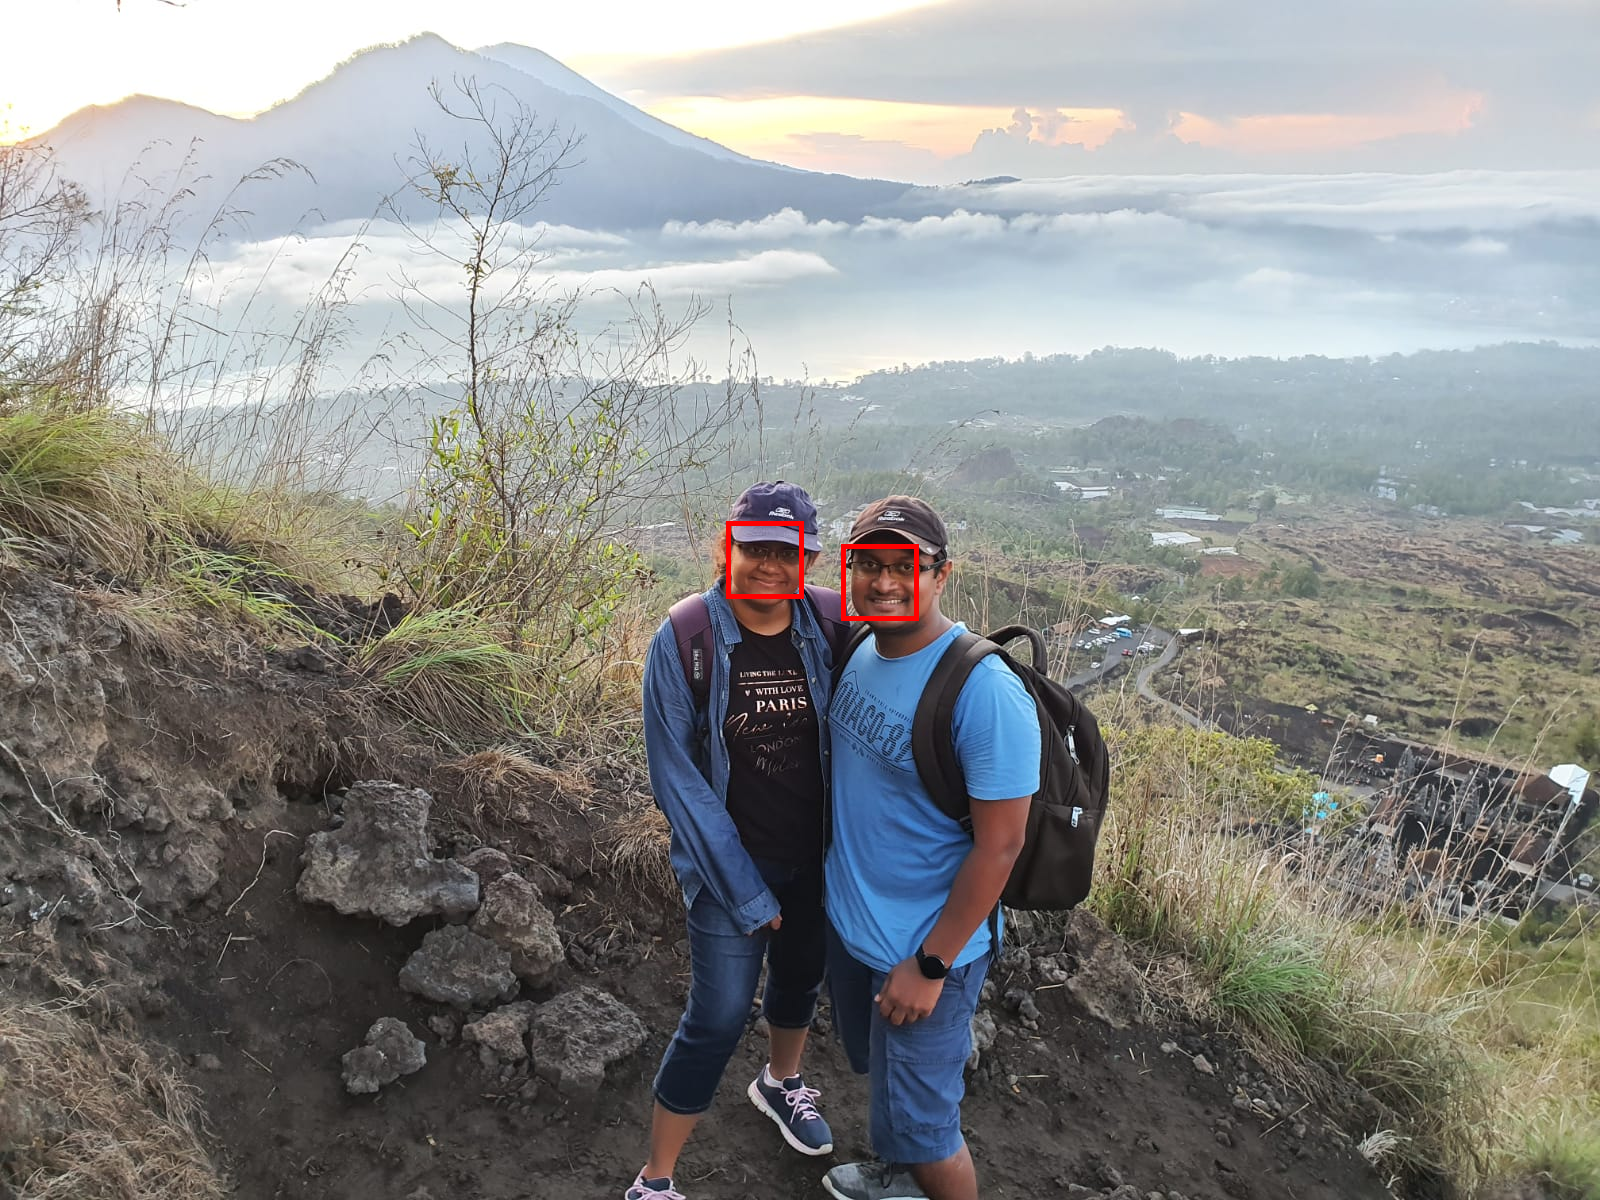

In [4]:
image_path = 'assets/hard_me_viji.JPG'

MAX_WIDTH = 500
MAX_HEIGHT = 500

image = Image.open(image_path).convert("RGB")
ratio = min(MAX_WIDTH / image.width, MAX_HEIGHT / image.height)

if ratio < 1:
    image = image.resize(
        (round(image.width * ratio), round(image.height * ratio))
    )
    
    
faces_both = face_recognition.face_locations(
    np.array(image), 
    number_of_times_to_upsample=2,
    model='cnn'
)

faces_both = [[x / ratio for x in face] for face in faces_both]
image_both = Image.open(image_path)
imagebb_both = ImageDraw.Draw(image_both)  

for (top, right, bottom, left) in faces_both:
    imagebb_both = ImageDraw.Draw(image_both) 
    shape = [left, top, right, bottom]
    imagebb_both.rectangle(shape, outline="red", width=5)
display(image_both)